In [2]:
#!python -m pip install --user pybaobab-0.1-py3-none-any.whl
!python3 -m pip install --index-url https://test.pypi.org/simple/ pybaobab==0.0.1

Looking in indexes: https://test.pypi.org/simple/


In [3]:
import pybaobab
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = arff.loadarff('vehicle.arff')

df = pd.DataFrame(data[0])
y = list(df['class'])
features = list(df.columns)
features.remove('class')
X = df.loc[:, features]

clf = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)
clf.fit(X, y)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=0)

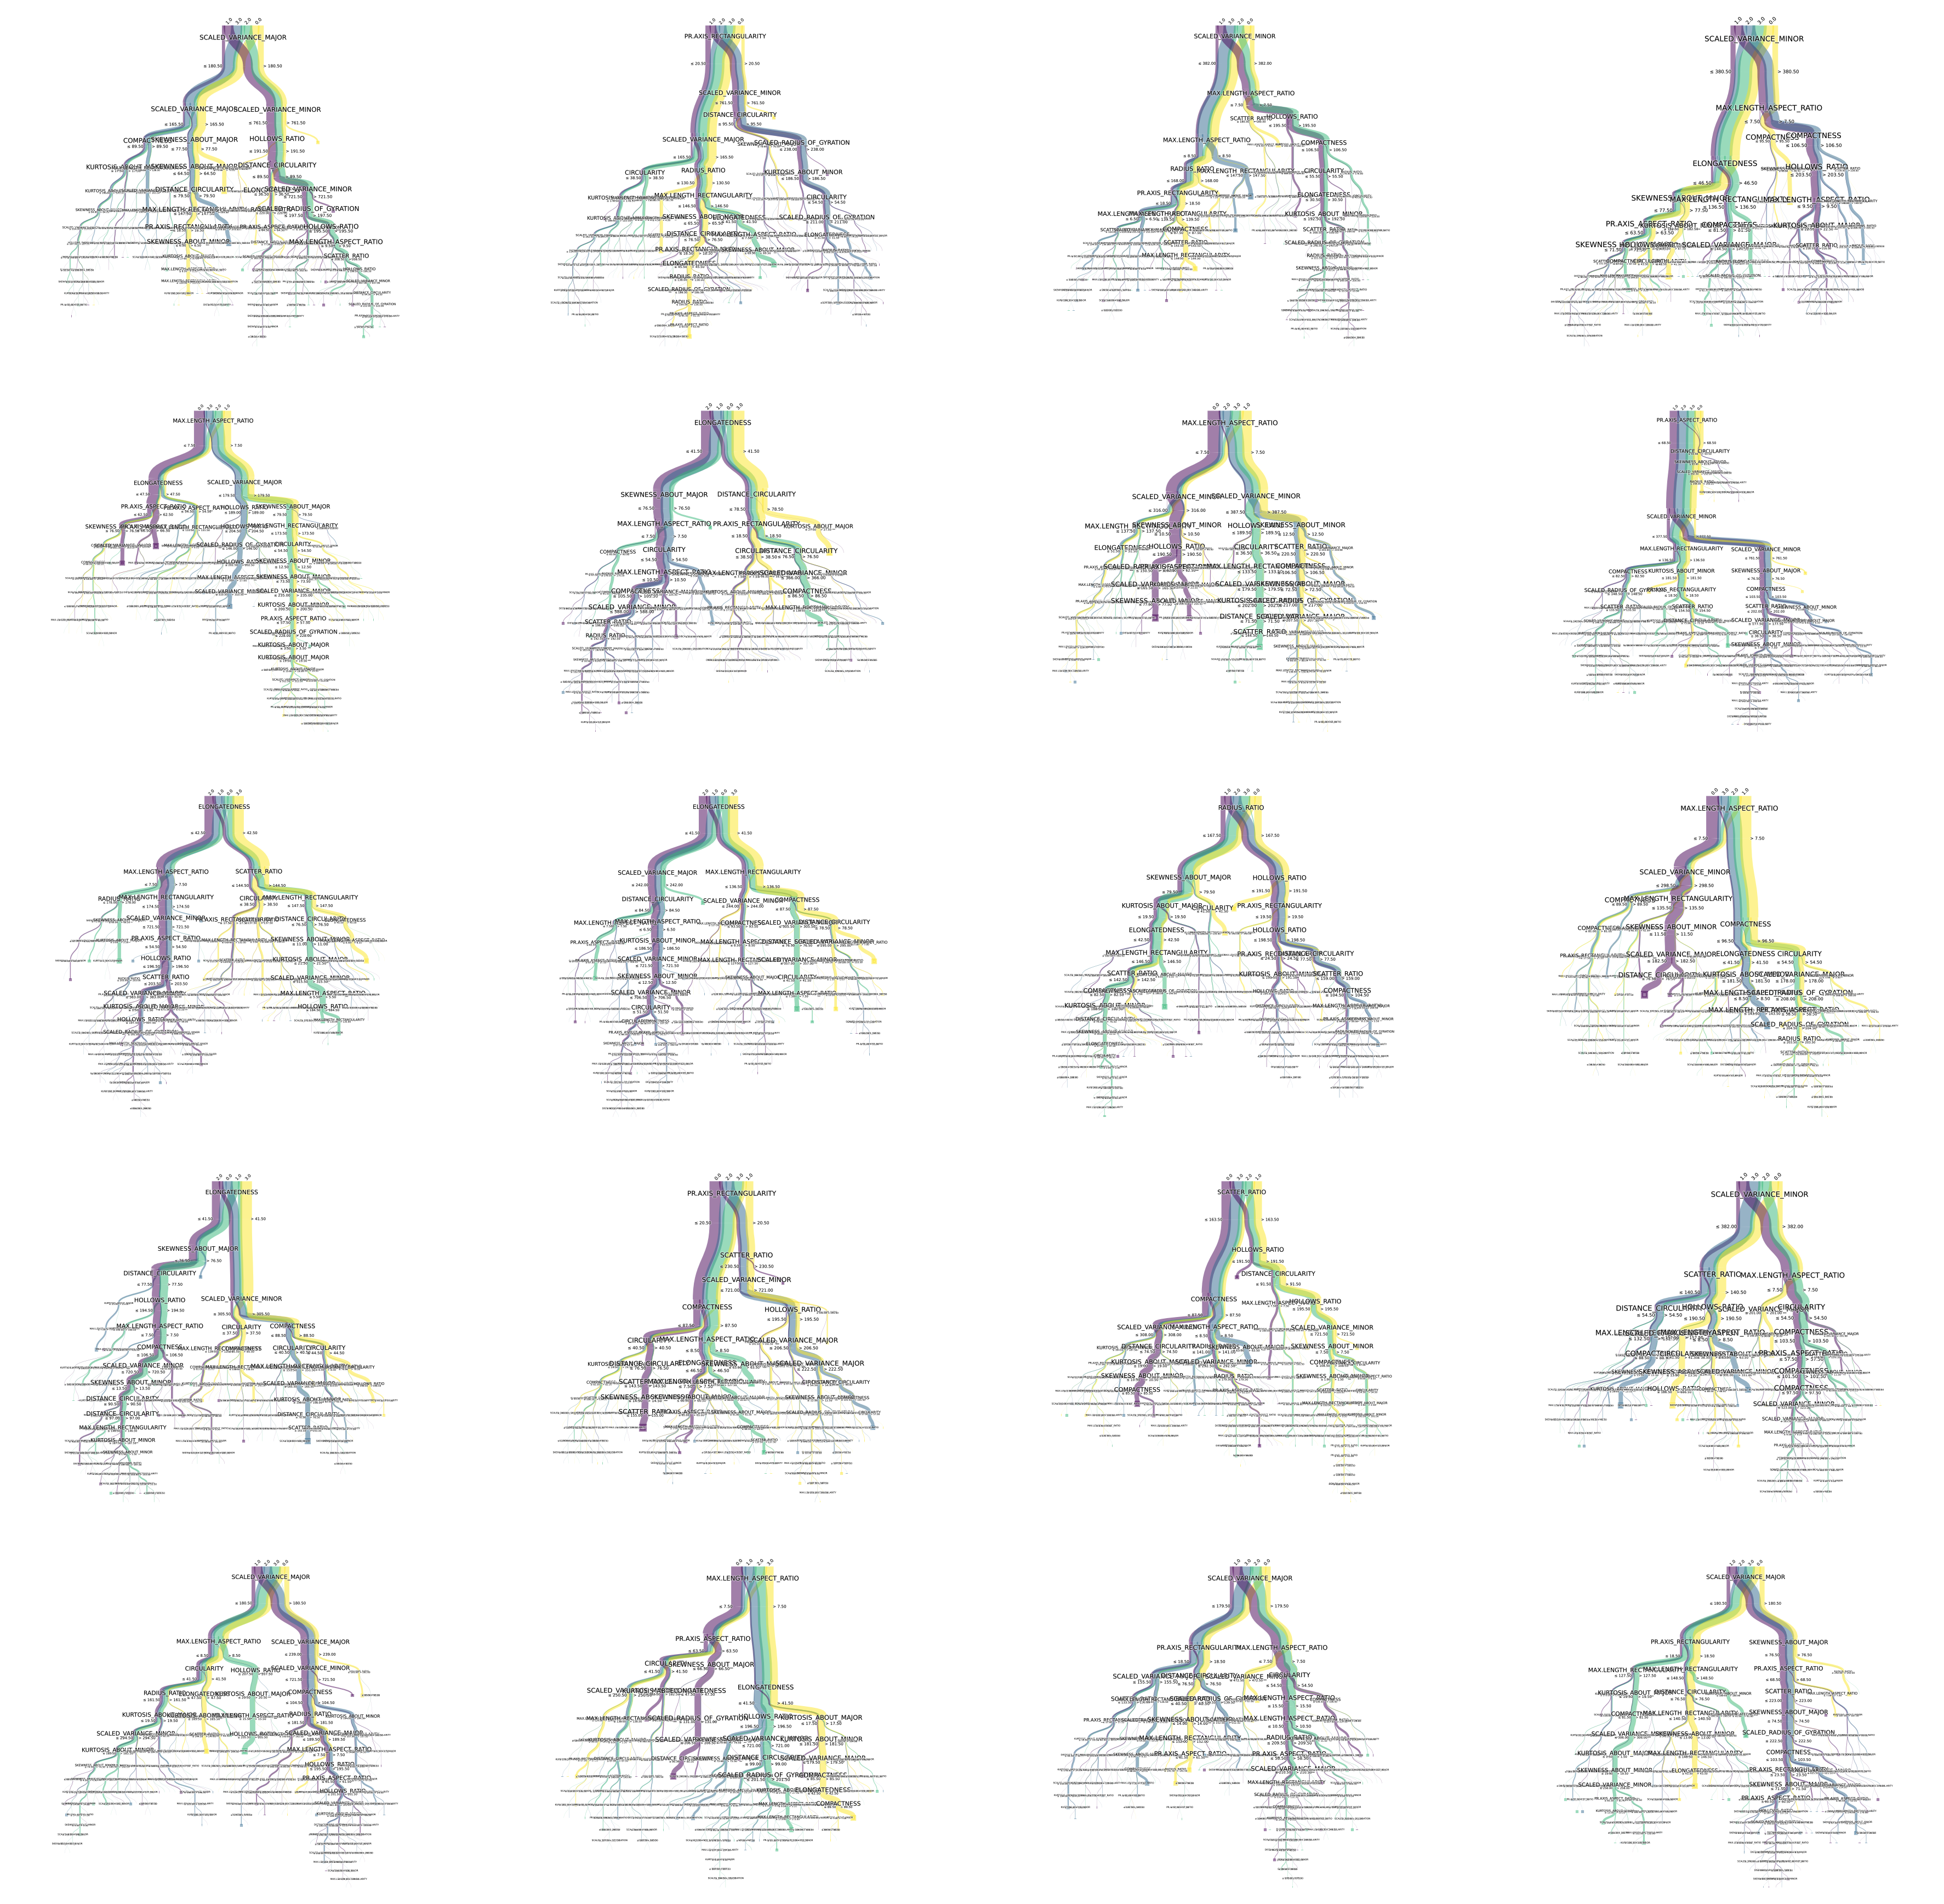

In [7]:
size = (15,15)
plt.rcParams['figure.figsize'] = size
fig = plt.figure(figsize=size, dpi=300)

for idx, tree in enumerate(clf.estimators_):
    ax1 = fig.add_subplot(5, 4, idx+1)
    pybaobab.drawTree(tree, model=clf, size=15, dpi=300, features=features, ax=ax1)
    
fig.savefig('random-forest.png', format='png', dpi=300, transparent=True)